# Scikit-learn Basics for Chemical Engineers

## Objectives

After this tutorial you will be able to:
- Understand the difference between fit, transform, and fit_transform
- Learn how to preprocess data properly
- Understand and create simple pipelines
- Apply these concepts to chemical engineering problems

## Table of Contents
1. [Setup and Data Creation](#1)
2. [Understanding Fit, Transform, and Fit_Transform](#2)
3. [Basic Preprocessing Steps](#3)
4. [Pipelines vs. Step-by-Step Approach](#4)
5. [Complete Example: Predicting Reaction Yield](#5)

<hr id="1">
<h3> 1. Setup and Data Creation </h3>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create sample chemical process data
np.random.seed(42)
n_samples = 100

# Create features: temperature (°C), pressure (atm), concentration (mol/L)
temperature = np.random.uniform(25, 100, n_samples)
pressure = np.random.uniform(1, 5, n_samples)
concentration = np.random.uniform(0.1, 2.0, n_samples)

# Create target: reaction yield (%)
yield_percent = (0.3 * temperature + 0.2 * pressure + 0.5 * concentration + 
                np.random.normal(0, 5, n_samples))

# Create DataFrame
data = pd.DataFrame({
    'Temperature': temperature,
    'Pressure': pressure,
    'Concentration': concentration,
    'Yield': yield_percent
})

print("Sample of our chemical process data:")
print(data.head())
print("\nData statistics:")
print(data.describe())

Sample of our chemical process data:
   Temperature  Pressure  Concentration      Yield
0    53.090509  1.125717       1.319860  17.040085
1    96.303573  3.545642       0.259866  26.472131
2    79.899546  2.257424       0.407095  35.344616
3    69.899386  3.034283       1.807253  25.649894
4    36.701398  4.630266       1.252215   2.436867

Data statistics:
       Temperature    Pressure  Concentration       Yield
count   100.000000  100.000000     100.000000  100.000000
mean     60.263556    2.991327       1.083443   19.568192
std      22.311706    1.172445       0.557510    8.773435
min      25.414159    1.027809       0.109617    2.436867
25%      39.490057    1.968018       0.626072   12.553707
50%      59.810684    3.022499       1.168854   19.512261
75%      79.765234    4.064734       1.529497   24.997789
max      99.016520    4.942602       1.981102   40.478389


<hr id="2">
<h3> 2. Understanding Fit, Transform, and Fit_Transform </h3>

In scikit-learn, there are three fundamental operations:

1. **fit**: Learn parameters from the data (e.g., mean and standard deviation)
2. **transform**: Apply the learned parameters to transform the data
3. **fit_transform**: Combine both operations in one step

### Fit: Transformers vs. Models

The `fit()` method serves different purposes depending on whether it's used with:

- **Transformers** (like StandardScaler, PCA): The `fit()` method calculates statistical parameters from the data (like mean, standard deviation, principal components) but doesn't change the data itself. These parameters are stored and later used during transformation.

- **Models** (like LinearRegression, RandomForest): The `fit()` method learns the actual predictive model parameters (like coefficients, weights, decision boundaries) that minimize error on the training data. Here, `fit()` is where the actual learning happens.

### Transform and Fit_Transform

- **transform()**: Only available for transformer objects, not models. It applies the previously learned parameters to transform new data.

- **fit_transform()**: A convenience method for transformers that combines fitting and transforming in one step. This is more efficient than calling `fit()` and `transform()` separately.

Let's see these in action with a simple scaling example:

In [2]:
# Create training and testing sets
X = data[['Temperature', 'Pressure', 'Concentration']]
y = data['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# 1. Using fit() and transform() separately
scaler = StandardScaler()
# First, fit the scaler to learn the parameters

scaler.fit(X_train)
print(scaler)

StandardScaler()


In [4]:
# Then, transform the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Method 1: Separate fit and transform")
print("Learned parameters:")
print("Mean values:", scaler.mean_)
print("Standard deviations:", scaler.scale_)
print("\nFirst few scaled training samples:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

Method 1: Separate fit and transform
Learned parameters:
Mean values: [60.10739213  3.01804136  1.0774205 ]
Standard deviations: [21.8425181   1.15064412  0.55130053]

First few scaled training samples:
   Temperature  Pressure  Concentration
0     1.558116 -0.912376       0.146022
1     1.439100  0.087395      -0.785401
2    -0.921682  1.089840       1.580444
3    -1.489217 -0.025244       1.380049
4     1.781348  0.300293      -0.761102


In [5]:
# 2. Using fit_transform() in one step (for training data only)
scaler_combined = StandardScaler()
X_train_scaled_combined = scaler_combined.fit_transform(X_train)

print("\nMethod 2: Combined fit_transform")
print("First few scaled training samples:")
print(pd.DataFrame(X_train_scaled_combined, columns=X.columns).head())

# Note: Results are identical, but Method 2 is more concise


Method 2: Combined fit_transform
First few scaled training samples:
   Temperature  Pressure  Concentration
0     1.558116 -0.912376       0.146022
1     1.439100  0.087395      -0.785401
2    -0.921682  1.089840       1.580444
3    -1.489217 -0.025244       1.380049
4     1.781348  0.300293      -0.761102


### Important Notes:

1. Always `fit` on training data only
2. Use `transform` for both training and test data
3. `fit_transform` is a convenience method for training data
4. Never use `fit_transform` on test data (would cause data leakage)

<hr id="3">
<h3> 3. Basic Preprocessing Steps </h3>

Let's look at different types of scaling and when to use them:

In [6]:
# Compare StandardScaler and MinMaxScaler
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply both scalers to our temperature data
temp_standard = standard_scaler.fit_transform(X_train[['Temperature']].values)
temp_minmax = minmax_scaler.fit_transform(X_train[['Temperature']].values)

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Original': X_train['Temperature'].head(),
    'StandardScaler': temp_standard.flatten()[:5],
    'MinMaxScaler': temp_minmax.flatten()[:5]
})

print("Comparing different scaling methods:")
print(comparison)
print("\nKey differences:")
print("- StandardScaler: Mean=0, STD=1")
print("- MinMaxScaler: Range=[0,1]")

Comparing different scaling methods:
     Original  StandardScaler  MinMaxScaler
55  94.140568        1.558116      0.933753
88  91.540956        1.439100      0.898433
26  39.975534       -0.921682      0.197838
42  27.579139       -1.489217      0.029415
69  99.016520        1.781348      1.000000

Key differences:
- StandardScaler: Mean=0, STD=1
- MinMaxScaler: Range=[0,1]


<hr id="4">
<h3> 4. Pipelines vs. Step-by-Step Approach </h3>

Now let's compare doing preprocessing and modeling step-by-step versus using a pipeline:

In [7]:
# Method 1: Step by Step
print("Method 1: Step by Step Approach")
# 1. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 3. Make predictions
y_pred = model.predict(X_test_scaled)

print("Test set predictions (first 5):")
print(y_pred[:5])

Method 1: Step by Step Approach
Test set predictions (first 5):
[ 9.79994418 30.82289378 29.71882615 25.39126273 12.87852515]


#### Method 2: Using Pipelines

Pipelines in scikit-learn are a powerful tool that allows you to chain multiple preprocessing steps and a final estimator into a single object. They help streamline your machine learning workflow by:

1. **Simplifying Code**: Combine multiple steps into a single, cohesive object
2. **Preventing Data Leakage**: Ensure preprocessing steps are properly applied to training and test data separately
3. **Improving Organization**: Keep all preprocessing and modeling steps in a logical sequence
4. **Enabling Easy Parameter Tuning**: Allow grid search across all pipeline components simultaneously
5. **Facilitating Model Deployment**: Package all preprocessing and model steps into one exportable object

The pipeline below will automatically apply the scaler to data before passing it to the regressor, both during training and prediction.


In [8]:

# Method 2: Using Pipeline
print("\nMethod 2: Pipeline Approach")
# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])


# Fit pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_pipeline = pipeline.predict(X_test)

print("Test set predictions (first 5):")
print(y_pred_pipeline[:5])

# Compare results
print("\nResults are identical:", np.allclose(y_pred, y_pred_pipeline))


Method 2: Pipeline Approach
Test set predictions (first 5):
[ 9.79994418 30.82289378 29.71882615 25.39126273 12.87852515]

Results are identical: True


### Advantages of Pipelines:

1. **Cleaner Code**: All steps in one object
2. **No Data Leakage**: Proper handling of train/test split
3. **Easy to Save/Load**: Single object to save
4. **Cross-Validation Ready**: Works directly with cross-validation

<hr id="5">
<h3> 5. Complete Example: Predicting Reaction Yield </h3>

Let's put everything together in a complete example:

Model Performance:
Training R² Score: 0.760
Testing R² Score: 0.329
Test RMSE: 7.248


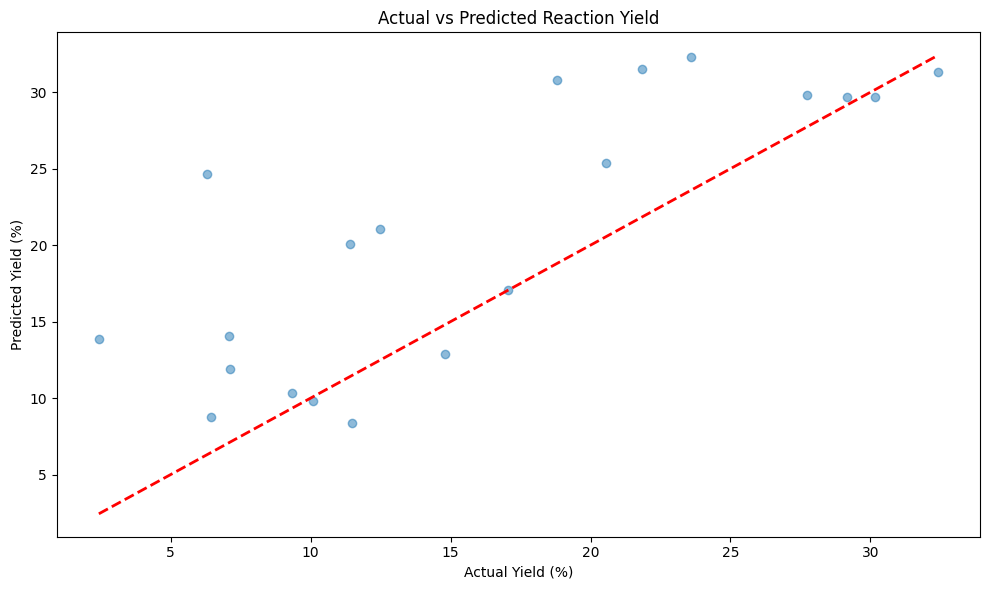


Feature Importance:
         Feature  Coefficient
0    Temperature     7.519708
2  Concentration     0.892555
1       Pressure     0.835325


In [9]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Create a more complex pipeline
reaction_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Fit the pipeline
reaction_pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred = reaction_pipeline.predict(X_train)
y_test_pred = reaction_pipeline.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Model Performance:")
print(f"Training R² Score: {train_r2:.3f}")
print(f"Testing R² Score: {test_r2:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield (%)')
plt.ylabel('Predicted Yield (%)')
plt.title('Actual vs Predicted Reaction Yield')
plt.tight_layout()
plt.show()

# Get feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': reaction_pipeline.named_steps['regressor'].coef_
})
print("\nFeature Importance:")
print(coefficients.sort_values(by='Coefficient', ascending=False))

### Key Takeaways:

1. **Preprocessing**:
   - Always fit preprocessors on training data only
   - Use transform for both train and test data

2. **Pipelines**:
   - Keep preprocessing steps organized
   - Prevent accidental data leakage
   - Make code more maintainable

3. **Best Practices**:
   - Use `fit_transform()` for training data
   - Use `transform()` for test data
   - Consider pipelines for complex workflows